<a href="https://colab.research.google.com/github/annefrancine/Deep-Learning-Models-/blob/master/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#! pip install tensorflow --upgrade

In [0]:
#!pip install Keras

# Import packages 

In [42]:
import tensorflow
print(tensorflow.__version__)

2.2.0-rc3


In [0]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# Loading the dataset


In [0]:
dataset = keras.datasets.fashion_mnist

In [0]:
((X_train,y_train),(X_test,y_test))= dataset.load_data()

# Exploring the data

In [46]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [47]:
len(X_train)
X_train.shape

(60000, 28, 28)

In [48]:
X_test.shape

(10000, 28, 28)

In [49]:
len(y_train)
y_train.shape

(60000,)

# Displaying the data

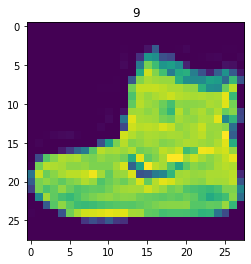

In [50]:
plt.imshow(X_train[0]);
plt.title(y_train[0]);

In [51]:
y_train.min(),y_train.max()

(0, 9)

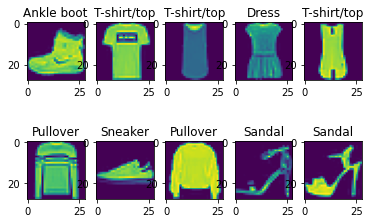

In [52]:
total_labels = 10
name_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress' , 'Coat' , 'Sandal' 
              ,'Shirt', 'Sneaker', 'Bag' , 'Ankle boot']

for X in range(10):
  plt.subplot(2, 5, X+1)
  plt.imshow(X_train[X])
  plt.title(name_labels[y_train[X]])

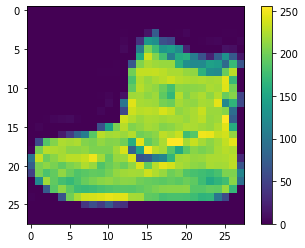

In [53]:
plt.imshow(X_train[0])
plt.colorbar();

# Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Model
Let’s define the model and train it. 



In [82]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historical = model.fit(X_train, y_train, epochs=5, validation_split=0.2)



Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5335 - accuracy: 0.8111 - val_loss: 0.4143 - val_accuracy: 0.8489
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4010 - accuracy: 0.8537 - val_loss: 0.3770 - val_accuracy: 0.8622
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3662 - accuracy: 0.8664 - val_loss: 0.3537 - val_accuracy: 0.8687
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3388 - accuracy: 0.8759 - val_loss: 0.3488 - val_accuracy: 0.8740
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3235 - accuracy: 0.8800 - val_loss: 0.3556 - val_accuracy: 0.8720


In [83]:
test = model.predict(X_test)
print('test result :', np.argmax(test[1]))
print('test image number :', y_test[1])

test result : 2
test image number : 2


In [84]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print('Loss:', loss_test)
print('Accuracy:', accuracy_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8653
Loss: 0.3710445463657379
Accuracy: 0.8652999997138977


# Saving and loading the trained model

In [0]:
from tensorflow.keras.models import load_model

model.save('model.h5')
model_salvo = load_model('model.h5')

# Viewing training and validation accuracy by epoch

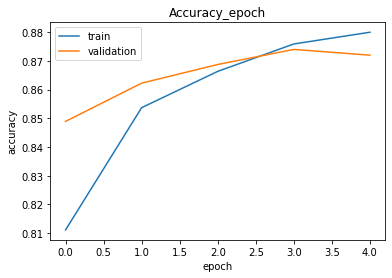

In [86]:
plt.plot(historical.history['accuracy'])
plt.plot(historical.history['val_accuracy'])
plt.title('Accuracy_epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation']);

# Viewing training losses and validation by epochs

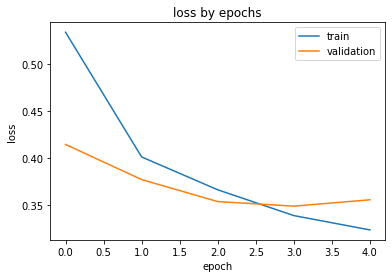

In [88]:
plt.plot(historical.history['loss'])
plt.plot(historical.history['val_loss'])
plt.title('loss by epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation']);

# Testing the model and the saved model

In [77]:
test = model.predict(X_test)
print('test result:', np.argmax(test[1]))
print('test image number:', y_test[1])


test result: 2
test image number: 2


In [0]:
test_model_save = model_salvo.predict(X_test)

In [79]:
print('test result:', np.argmax(test_model_save[1]))
print('test image number:', y_test[1])

test result: 2
test image number: 2


# Evaluating the model

In [80]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print('Loss:', loss_test)
print('Accuracy:', accuracy_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8653
Loss: 0.40101176500320435
Accuracy: 0.8652999997138977
